In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn


Accuracy: 0.855072463768116

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85        70
           1       0.82      0.90      0.86        68

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.85       138
weighted avg       0.86      0.86      0.85       138



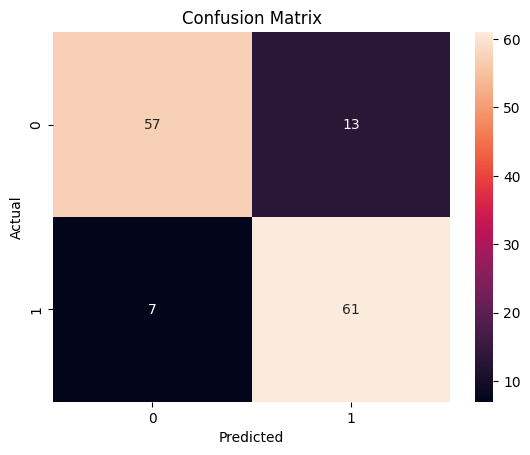

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data"
column_names = [
    "A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10",
    "A11", "A12", "A13", "A14", "A15", "A16"
]
data = pd.read_csv(url, names=column_names, na_values="?")

# Handle missing values
data.fillna(data.mode().iloc[0], inplace=True)

# Encode categorical columns
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split features and target
X = data.drop("A16", axis=1)
y = data["A16"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model: Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
